# Alzheimer's Disease Dataset

## Patient Information
### Patient ID
- PatientID: A unique identifier assigned to each patient (4751 to 6900).
### Demographic Details
- Age: The age of the patients ranges from 60 to 90 years.
- Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the patients, coded as follows:
        0: Caucasian
        1: African American
        2: Asian
        3: Other
- EducationLevel: The education level of the patients, coded as follows:
        0: None
        1: High School
        2: Bachelor's
        3: Higher
### Lifestyle Factors
- BMI: Body Mass Index of the patients, ranging from 15 to 40.
- Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
- AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
- PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
- DietQuality: Diet quality score, ranging from 0 to 10.
- DeepQuality: Sleep quality score, ranging from 4 to 10.
### Medical History
- FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
- HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
- Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
### Clinical Measurements
- SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
- DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.
- Cognitive and Functional Assessments
- MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
### Symptoms
- Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
- Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
### Diagnosis Information
- Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- Confidential Information
- DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

In [1]:
# Importaciones de librerías estándar

import os
import sys
import numpy as np
import pandas as pd

# Importaciones de librerías de terceros

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Librería para visualizar valores faltantes

# Preprocesamiento, modelado y evaluación
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, roc_curve, precision_score, auc

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

# Modelos avanzados
from xgboost import XGBClassifier
import lightgbm as lgb

# Técnicas de sobremuestreo y submuestreo
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Selección de características
from boruta import BorutaPy

# Optimización de hiperparámetros
from skopt import BayesSearchCV


In [2]:
# Data set de kaggle: Alzheimer's Disease Dataset
# https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset?resource=download

# Cargamos el dataset del archivo CSV
df = pd.read_csv('../dataset/alzheimers_disease_data.csv')

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [3]:
# Agregamos el archivo util_functions.py   //archivo personal con funciones utiles//
module_path = os.path.abspath(os.path.join('..', 'functions_RoCCO'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

# Importa la función missing_case_summary
from util_functions import *

In [4]:
# Revisamos valores faltantes y porcentajes
missing_data_by_column(df)

,variable,n_missing,n_cases,complete_cases,pct_missing
0,PatientID,0,2149,2149,0.0
1,Age,0,2149,2149,0.0
2,Gender,0,2149,2149,0.0
3,Ethnicity,0,2149,2149,0.0
4,EducationLevel,0,2149,2149,0.0
5,BMI,0,2149,2149,0.0
6,Smoking,0,2149,2149,0.0
7,AlcoholConsumption,0,2149,2149,0.0
8,PhysicalActivity,0,2149,2149,0.0
9,DietQuality,0,2149,2149,0.0


In [5]:
# Verificamos valores duplicados
df.duplicated().value_counts()

False    2149
Name: count, dtype: int64

In [6]:
# Vemos una muestra de los datos

In [7]:
# Eliminamos 'PatiendID' y 'DoctorInCharge', para nuestro analisis no son necesarios
df = df.drop(['PatientID','DoctorInCharge'],axis=1)

In [8]:
# Verificamos si tenemos variables de tipo no numerico
df.select_dtypes(exclude=['int64', 'float64']).columns

Index([], dtype='object')

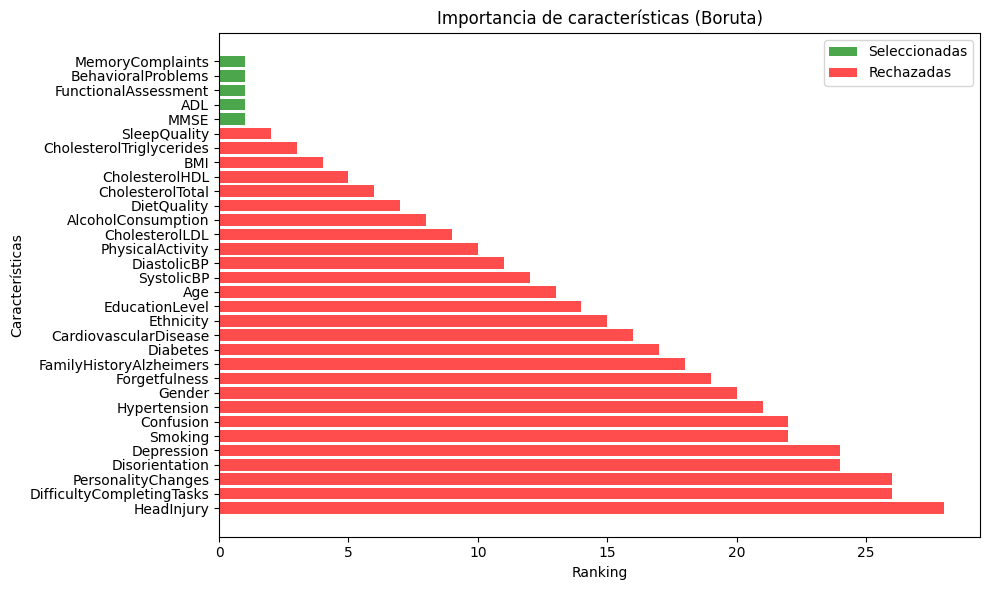

In [9]:
# Ingenieria de Caracteristicas, usamos un algoritmo clasificados para encontrar o definir las columnas que son relevantes para predecir o calcular la columna objetivo.

features = df.drop(columns=['Diagnosis']) # Caracteristicas
target = df['Diagnosis'] # Objetivo

# Creamos un clasificador RandomForest
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=5, random_state=42)

# Inicializamos Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

# Ajustamos Boruta
boruta_selector.fit(features.values, target.values)  # Usamos los datos de entrenamiento

# Vemos las características seleccionadas por Boruta
selected_features = features.columns[boruta_selector.support_]

# Vemos las características rechazadas por Boruta
rejected_features = features.columns[boruta_selector.support_ == False]

# Ver la importancia de las características
importances = boruta_selector.ranking_

# Convertimos las importancias y rankings en un DataFrame para facilitar la visualización
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Ranking': boruta_selector.ranking_,
    'Selected': boruta_selector.support_
})

# Ordenamos por el ranking
importance_df = importance_df.sort_values(by='Ranking')

# Dividimos las características seleccionadas y rechazadas
selected = importance_df[importance_df['Selected'] == True]
rejected = importance_df[importance_df['Selected'] == False]

# Gráfico de barras para características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(selected['Feature'], selected['Ranking'], color='green', alpha=0.7, label='Seleccionadas')
plt.barh(rejected['Feature'], rejected['Ranking'], color='red', alpha=0.7, label='Rechazadas')
plt.xlabel('Ranking')
plt.ylabel('Características')
plt.title('Importancia de características (Boruta)')
plt.legend()
plt.gca().invert_yaxis()  # Invertimos el eje para que las más importantes estén arriba
plt.tight_layout()
plt.show()

In [10]:
# Haremos pruebas con las caracteristicas, en este caso usamores solo caractersiticas relevantes.
features_selected = features[features.columns[(boruta_selector.ranking_ <= 1)]]
print(features_selected.columns,'\n')
print("Distribución de clases:")
print(target.value_counts())

Index(['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object') 

Distribución de clases:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


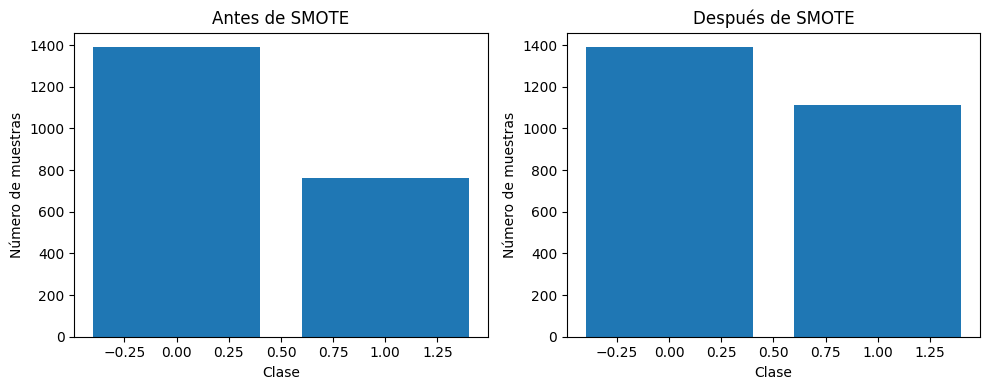

Distribución de clases después del balanceo:
Diagnosis
0    1389
1    1111
Name: count, dtype: int64


In [11]:
# Estrategia de sobremuestreo: 
# Se usará SMOTE para aumentar la clase minoritaria
smote = SMOTE(sampling_strategy=0.8, random_state=42)
features_smote, target_smote = smote.fit_resample(features, target)

# Visualización de la distribución
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar([0, 1], np.bincount(target))
plt.title("Antes de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")

plt.subplot(1,2,2)
plt.bar([0, 1], np.bincount(target_smote))
plt.title("Después de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.tight_layout()
plt.show()

# Verificar la distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(pd.Series(target_smote).value_counts())

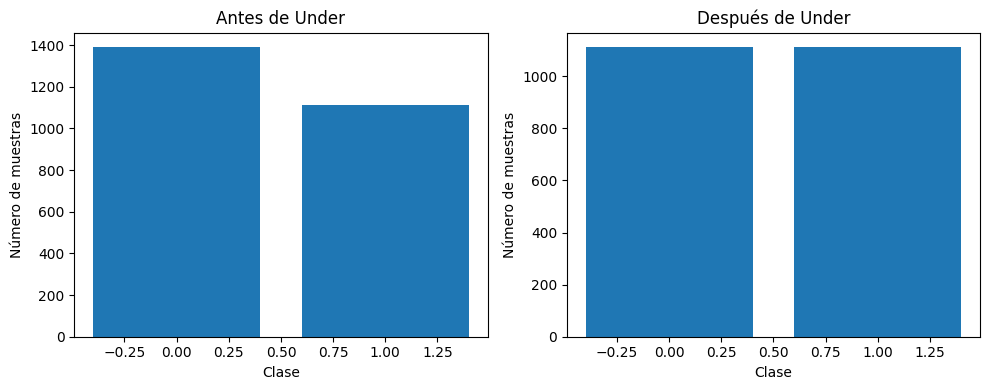

Distribución de clases después del balanceo:
Diagnosis
0    1111
1    1111
Name: count, dtype: int64


In [12]:
# Estrategia de sobremuestreo: 
# Se usará RandomUnder para disminuir la clase mayoritaria.
under = RandomUnderSampler(sampling_strategy=1, random_state=42)
features_balanced, target_balanced = under.fit_resample(features_smote, target_smote)

# Opcional: Visualización de la distribución
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar([0, 1], np.bincount(target_smote))
plt.title("Antes de Under")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")

plt.subplot(1,2,2)
plt.bar([0, 1], np.bincount(target_balanced))
plt.title("Después de Under")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.tight_layout()
plt.show()

# Verificar la distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(pd.Series(target_balanced).value_counts())

In [13]:
# Primero Intentaremos con correr el modelo con los valores seleccionados como relevantes por BorutaPy
features_boruta_selected = features_balanced[features_selected.columns]

In [14]:
# Escalamiento de valores

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos y transforma las columnas numéricas
features_scaled_balanced = scaler.fit_transform(features_boruta_selected)

# Obtenemos los valores de entrenamiento y revision (prueba y validacion) 75/25
features_train_balanced_scaled, features_review, target_train_balanced, target_review = train_test_split(features_scaled_balanced, target_balanced, train_size=0.25, random_state=42)
# Obtenemos los datos de prueba y validacion 15/10
features_test_scaled, features_valid, target_test, target_valid =train_test_split(features_review,target_review, train_size=0.4, random_state=42)


#### Modelo de Clasificacion

                       Model   AUC-ROC  Accuracy  CV AUC-ROC  CV Accuracy
0              Random Forest  0.935979  0.891892    0.938017     0.893694
1          Gradient Boosting  0.932998  0.893393    0.930478     0.870270
2                    XGBoost  0.931055  0.878378    0.929144     0.875676
3                        SVM  0.926974  0.870871    0.915557     0.850450
4             MLP Classifier  0.915669  0.864865    0.911589     0.852252
5  K-Nearest Neighbors (KNN)  0.918844  0.861862    0.887894     0.839640
6        Logistic Regression  0.887198  0.800300    0.865565     0.796396
7                Naive Bayes  0.877071  0.825826    0.860812     0.812613
8             SGD Classifier  0.846300  0.761261    0.804983     0.720721


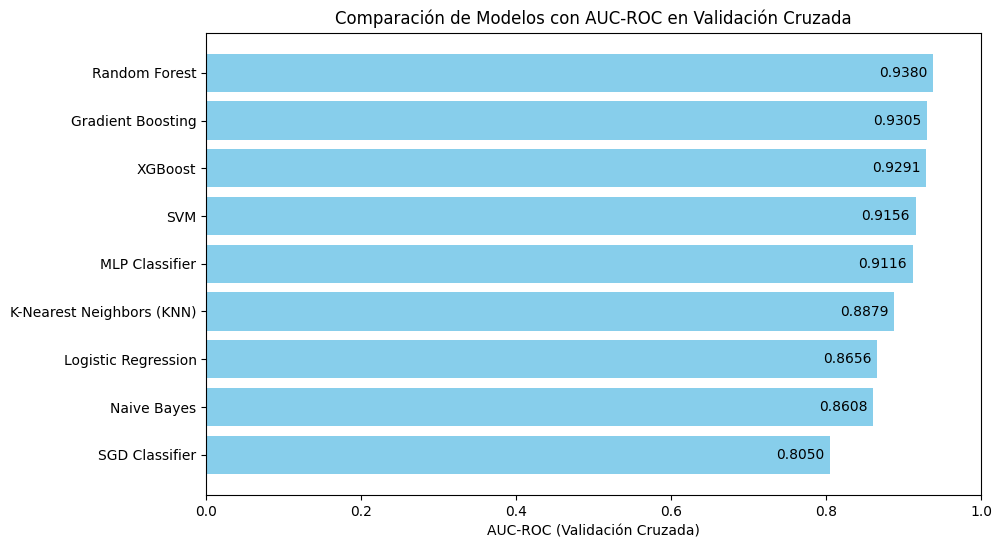

In [15]:
# Modelos de clasificación para comparación y selección de los 3 modelos más prometedores
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # Necesitamos 'probability=True' para calcular ROC-AUC
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "MLP Classifier": MLPClassifier(learning_rate_init=0.1, hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(random_state=42)  
}

# Función para evaluar AUC-ROC, exactitud y validación cruzada
def evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test):
    model.fit(features_train_balanced_scaled, target_train_balanced)
    
    if hasattr(model, "predict_proba"):  # Modelos con predict_proba
        y_pred_prob = model.predict_proba(features_test_scaled)[:, 1]
    else:  # Modelos sin predict_proba (como SVM)
        y_pred_prob = model.decision_function(features_test_scaled)
        
    y_pred = model.predict(features_test_scaled)  # Predicciones de clase
    
    auc_score = roc_auc_score(target_test, y_pred_prob)  # AUC-ROC
    accuracy = accuracy_score(target_test, y_pred)  # Exactitud
    
    # Validación cruzada para cada modelo
    cv_auc = cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='roc_auc')
    cv_accuracy = cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='accuracy')
    
    return auc_score, accuracy, np.mean(cv_auc), np.mean(cv_accuracy), model

# Comparamos los modelos
auc_scores = []
accuracy_scores = []
cv_auc_scores = []
cv_accuracy_scores = []

for model_name, model in models.items():
    auc_score, accuracy, mean_cv_auc, mean_cv_accuracy, trained_model = evaluate_model(
        model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test
    )
    auc_scores.append((model_name, auc_score))
    accuracy_scores.append((model_name, accuracy))
    cv_auc_scores.append((model_name, mean_cv_auc))
    cv_accuracy_scores.append((model_name, mean_cv_accuracy))
    
# Creamos un DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': [score[0] for score in auc_scores],  # Nombres de los modelos
    'AUC-ROC': [score[1] for score in auc_scores],  # Valores de AUC-ROC
    'Accuracy': [score[1] for score in accuracy_scores],  # Valores de Exactitud
    'CV AUC-ROC': [score[1] for score in cv_auc_scores],  # Resultados de AUC-ROC en validación cruzada
    'CV Accuracy': [score[1] for score in cv_accuracy_scores]  # Resultados de Exactitud en validación cruzada
})

# Ordenamos por AUC-ROC en orden descendente
results_df = results_df.sort_values(by='CV AUC-ROC', ascending=False).reset_index(drop=True)

# Mostramos el DataFrame ordenado
print(results_df)

results_df = results_df.sort_values(by='CV AUC-ROC', ascending=True).reset_index()

# Gráfico de AUC-ROC ordenado
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Model'], results_df['CV AUC-ROC'], color='skyblue')
plt.xlabel('AUC-ROC (Validación Cruzada)')
plt.title('Comparación de Modelos con AUC-ROC en Validación Cruzada')
plt.xlim(0, 1)

# Agregamos los valores de AUC-ROC al lado de las barras
for bar in bars:
    width = bar.get_width()  # El valor de AUC-ROC (longitud de la barra)
    plt.text(width - 0.07, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', va='center')

plt.show()

Resultados de Evaluación:
                  Model Name     CV F1  CV Precision  CV Recall  CV AUC-ROC
0              Random Forest  0.903322      0.937812   0.860496    0.938665
1                    XGBoost  0.877754      0.893362   0.863884    0.929144
2          Gradient Boosting  0.871088      0.899218   0.849970    0.931843
3             MLP Classifier  0.857677      0.871356   0.808227    0.919711
4                        SVM  0.853001      0.863829   0.843013    0.915557
5  K-Nearest Neighbors (KNN)  0.846730      0.836936   0.857229    0.887894
6                Naive Bayes  0.814394      0.832335   0.797762    0.860812
7        Logistic Regression  0.805663      0.796522   0.815245    0.865565
8             SGD Classifier  0.730759      0.731319   0.741682    0.804983


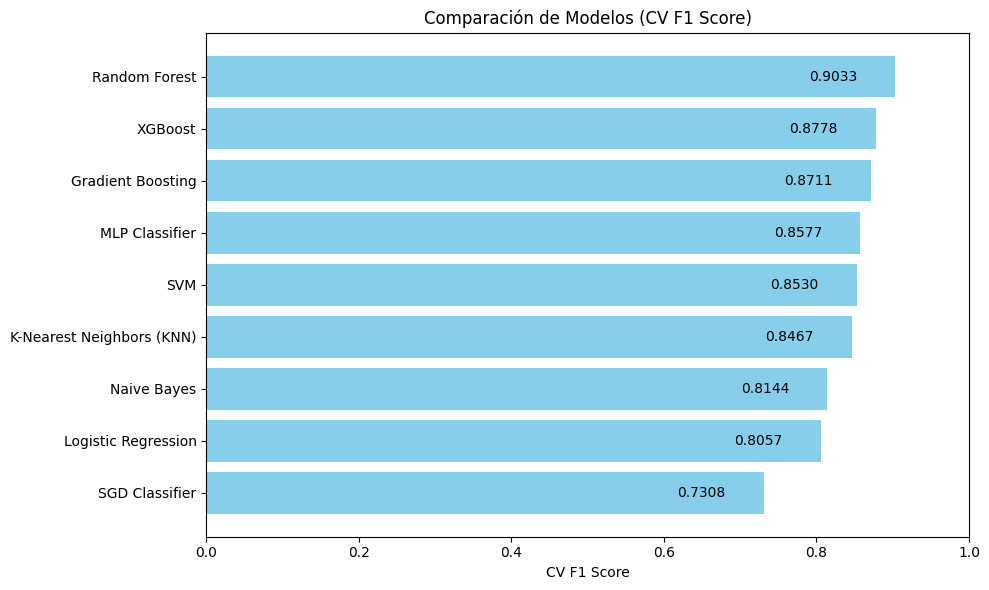

In [16]:
# Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # Necesario para calcular AUC-ROC
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "MLP Classifier": MLPClassifier(learning_rate_init=0.1, hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(random_state=42)  
}

# Función para evaluar modelos y calcular métricas
def evaluate_model(model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    
    # Calcular probabilidades o función de decisión para AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(features_test)[:, 1]
    else:
        y_pred_prob = model.decision_function(features_test)
    
    # Predicciones de clase
    y_pred = model.predict(features_test)
    
    # Métricas en test
    auc_score = roc_auc_score(target_test, y_pred_prob)
    f1 = f1_score(target_test, y_pred)
    precision = precision_score(target_test, y_pred)
    recall = recall_score(target_test, y_pred)
    
    # Validación cruzada (usamos 5-fold)
    cv_f1 = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring='f1'))
    cv_precision = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring='precision'))
    cv_recall = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring='recall'))
    cv_auc = np.mean(cross_val_score(model, features_train, target_train, cv=5, scoring='roc_auc'))
    
    return {
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC-ROC': auc_score,
        'CV F1': cv_f1,
        'CV Precision': cv_precision,
        'CV Recall': cv_recall,
        'CV AUC-ROC': cv_auc,
        'Model': model
    }

# Listas para almacenar resultados
results = []

for model_name, model in models.items():
    metrics = evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test)
    metrics['Model Name'] = model_name
    results.append(metrics)

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['Model Name', 'F1', 'Precision', 'Recall', 'AUC-ROC', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC'])
results_df = results_df.sort_values(by='CV F1', ascending=False).reset_index(drop=True)

print("Resultados de Evaluación:")
print(results_df[['Model Name', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC']])

resultad_df_sorted = results_df.sort_values(by='CV F1', ascending=True)

# Gráfico de barras horizontal utilizando la métrica CV F1 Score
plt.figure(figsize=(10, 6))
bars = plt.barh(resultad_df_sorted['Model Name'],resultad_df_sorted['CV F1'] , color='skyblue')
plt.xlabel('CV F1 Score')
plt.title('Comparación de Modelos (CV F1 Score)')
plt.xlim(0, 1)

# Agregar los valores al lado de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()


Mejores parámetros encontrados: OrderedDict({'max_depth': 3, 'max_features': 0.22559876368893964, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 220})


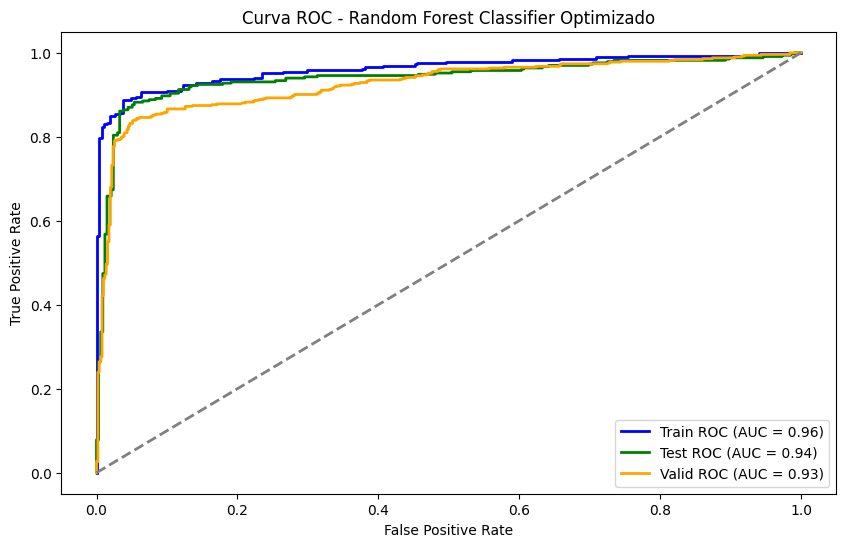


Cuadro de Métricas:
       F1-Score  Accuracy    Recall   AUC-ROC
Train  0.918728  0.917117  0.905923  0.961646
Test   0.892171  0.890390  0.912387  0.939816
Valid  0.868687  0.870130  0.872211  0.925630


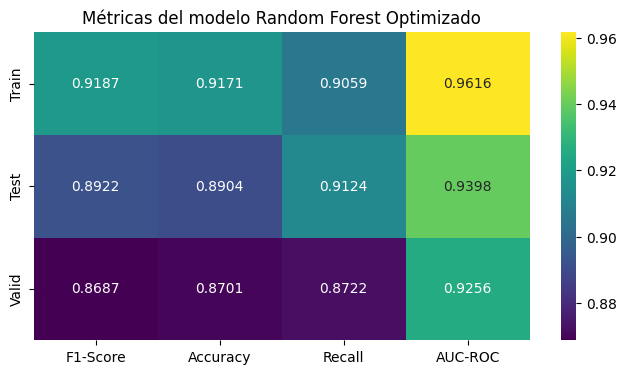

In [17]:
# Optimiacion Bayesiana para el modelo Random Forest
param_space = {
    'n_estimators': (50, 500),        # Número de árboles
    'max_depth': (3, 20),             # Profundidad máxima de los árboles
    'min_samples_split': (2, 20),     # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': (1, 20),      # Mínimo número de muestras en un nodo hoja
    'max_features': (0.1, 1.0)  # Fracción de características utilizadas en cada árbol
}

# Instanciamos el modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Realizar la optimización con BayesSearchCV (buscando maximizar el AUC-ROC)
opt_rf = BayesSearchCV(rf_model, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=0, scoring='roc_auc')

# Ajustamos el modelo optimizado sobre los datos de entrenamiento
opt_rf.fit(features_train_balanced_scaled, target_train_balanced)

# Establecemos el mejor modelo encontrado
best_model = opt_rf.best_estimator_
print("Mejores parámetros encontrados:", opt_rf.best_params_)

# Predicciones de probabilidad (para AUC-ROC)
y_train_pred_prob = best_model.predict_proba(features_train_balanced_scaled)[:, 1]
y_test_pred_prob  = best_model.predict_proba(features_test_scaled)[:, 1]
y_valid_pred_prob = best_model.predict_proba(features_valid)[:, 1]

# Predicciones de clase (para Accuracy, Recall, F1-Score)
y_train_pred = best_model.predict(features_train_balanced_scaled)
y_test_pred  = best_model.predict(features_test_scaled)
y_valid_pred = best_model.predict(features_valid)

# Cálculo de métricas para cada conjunto

# AUC-ROC
train_auc = roc_auc_score(target_train_balanced, y_train_pred_prob)
test_auc  = roc_auc_score(target_test, y_test_pred_prob)
valid_auc = roc_auc_score(target_valid, y_valid_pred_prob)

# Accuracy
train_acc = accuracy_score(target_train_balanced, y_train_pred)
test_acc  = accuracy_score(target_test, y_test_pred)
valid_acc = accuracy_score(target_valid, y_valid_pred)

# Recall
train_recall = recall_score(target_train_balanced, y_train_pred)
test_recall  = recall_score(target_test, y_test_pred)
valid_recall = recall_score(target_valid, y_valid_pred)

# F1-Score
train_f1 = f1_score(target_train_balanced, y_train_pred)
test_f1  = f1_score(target_test, y_test_pred)
valid_f1 = f1_score(target_valid, y_valid_pred)

# Validación cruzada para AUC-ROC (opcional, para robustecer la evaluación)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_auc_scores(features, target):
    scores = []
    # Si 'target' es un DataFrame/Series, usar .iloc[] y convertir a array
    target_array = target.iloc[:] if isinstance(target, pd.Series) else target
    for train_idx, val_idx in cv.split(features, target_array):
        X_train_fold, X_val_fold = features[train_idx], features[val_idx]
        y_train_fold = np.array(target.iloc[train_idx]) if isinstance(target, pd.Series) else target[train_idx]
        y_val_fold   = np.array(target.iloc[val_idx]) if isinstance(target, pd.Series) else target[val_idx]
        best_model.fit(X_train_fold, y_train_fold)
        y_val_pred_prob = best_model.predict_proba(X_val_fold)[:, 1]
        scores.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    return np.mean(scores)

mean_cv_auc_train = cv_auc_scores(features_train_balanced_scaled, target_train_balanced)
mean_cv_auc_test  = cv_auc_scores(features_test_scaled, target_test)
mean_cv_auc_valid = cv_auc_scores(features_valid, target_valid)

# Calcular la curva ROC para cada conjunto
fpr_train, tpr_train, _ = roc_curve(target_train_balanced, y_train_pred_prob)
fpr_test,  tpr_test,  _ = roc_curve(target_test, y_test_pred_prob)
fpr_valid, tpr_valid, _ = roc_curve(target_valid, y_valid_pred_prob)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test  = auc(fpr_test, tpr_test)
roc_auc_valid = auc(fpr_valid, tpr_valid)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'Valid ROC (AUC = {roc_auc_valid:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest Classifier Optimizado')
plt.legend(loc='lower right')
plt.show()

# Creamos un DataFrame con las métricas y visualizarlo con un heatmap

metrics_df = pd.DataFrame({
    "F1-Score": [train_f1, test_f1, valid_f1],
    "Accuracy": [train_acc, test_acc, valid_acc],
    "Recall": [train_recall, test_recall, valid_recall],
    "AUC-ROC": [train_auc, test_auc, valid_auc]
}, index=["Train", "Test", "Valid"])

print("\nCuadro de Métricas:")
print(metrics_df)

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='viridis', cbar=True)
plt.title("Métricas del modelo Random Forest Optimizado")
plt.show()


Mejores parámetros encontrados: OrderedDict({'learning_rate': 0.030147581686311528, 'max_depth': 3, 'max_features': 0.3828183350050176, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0})


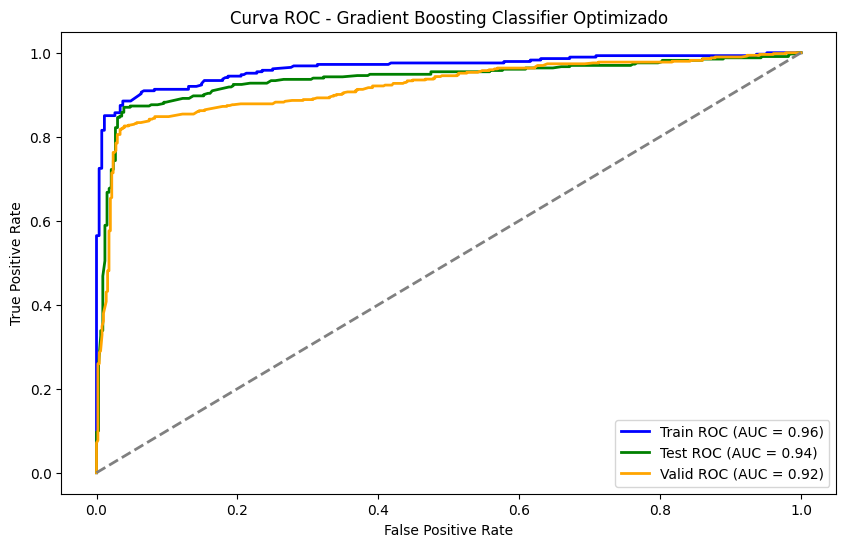


Cuadro de Métricas:
       F1-Score  Accuracy    Recall   AUC-ROC
Train  0.907749  0.909910  0.857143  0.964468
Test   0.907378  0.911411  0.873112  0.936939
Valid  0.880517  0.889111  0.829615  0.919377


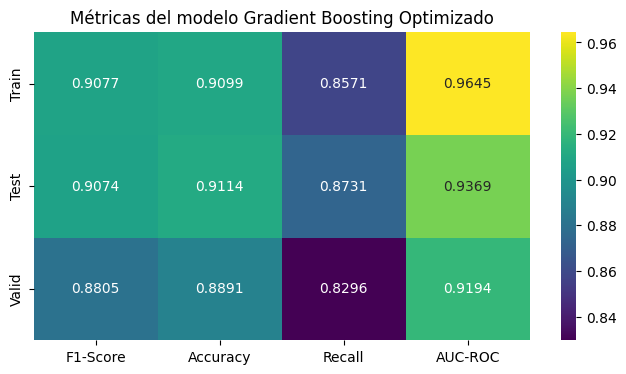

In [18]:
# Optimiacion Bayesiana para el modelo Gradient Boosting
param_space = {
    'n_estimators': (50, 500),                  # Número de árboles
    'learning_rate': (0.01, 0.2),               # Tasa de aprendizaje
    'max_depth': (3, 20),                       # Profundidad máxima de los árboles
    'min_samples_split': (2, 20),               # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': (1, 20),                # Mínimo número de muestras en un nodo hoja
    'subsample': (0.5, 1.0),                    # Fracción de muestras usadas para entrenar cada árbol
    'max_features': (0.1, 1.0)                  # Fracción de características utilizadas en cada árbol
}

# Instanciamos el modelo GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

# Realizamos la optimización con BayesSearchCV (buscando maximizar el AUC-ROC)
opt_gb = BayesSearchCV(gb_model, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=0, scoring='roc_auc')

# Ajustamos el modelo optimizado sobre los datos de entrenamiento
opt_gb.fit(features_train_balanced_scaled, target_train_balanced)

# Establecemos el mejor modelo encontrado
best_model = opt_gb.best_estimator_
print("Mejores parámetros encontrados:", opt_gb.best_params_)

# Predicciones de probabilidad (para AUC-ROC)
y_train_pred_prob = best_model.predict_proba(features_train_balanced_scaled)[:, 1]
y_test_pred_prob  = best_model.predict_proba(features_test_scaled)[:, 1]
y_valid_pred_prob = best_model.predict_proba(features_valid)[:, 1]

# Predicciones de clase (para Accuracy, Recall, F1-Score)
y_train_pred = best_model.predict(features_train_balanced_scaled)
y_test_pred  = best_model.predict(features_test_scaled)
y_valid_pred = best_model.predict(features_valid)

# Cálculo de métricas para cada conjunto

# AUC-ROC
train_auc = roc_auc_score(target_train_balanced, y_train_pred_prob)
test_auc  = roc_auc_score(target_test, y_test_pred_prob)
valid_auc = roc_auc_score(target_valid, y_valid_pred_prob)

# Accuracy
train_acc = accuracy_score(target_train_balanced, y_train_pred)
test_acc  = accuracy_score(target_test, y_test_pred)
valid_acc = accuracy_score(target_valid, y_valid_pred)

# Recall
train_recall = recall_score(target_train_balanced, y_train_pred)
test_recall  = recall_score(target_test, y_test_pred)
valid_recall = recall_score(target_valid, y_valid_pred)

# F1-Score
train_f1 = f1_score(target_train_balanced, y_train_pred)
test_f1  = f1_score(target_test, y_test_pred)
valid_f1 = f1_score(target_valid, y_valid_pred)

# Validación cruzada para AUC-ROC (opcional, para robustecer la evaluación)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_auc_scores(features, target):
    scores = []
    # Si 'target' es un DataFrame/Series, usar .iloc[] y convertir a array
    target_array = target.iloc[:] if isinstance(target, pd.Series) else target
    for train_idx, val_idx in cv.split(features, target_array):
        X_train_fold, X_val_fold = features[train_idx], features[val_idx]
        y_train_fold = np.array(target.iloc[train_idx]) if isinstance(target, pd.Series) else target[train_idx]
        y_val_fold   = np.array(target.iloc[val_idx]) if isinstance(target, pd.Series) else target[val_idx]
        best_model.fit(X_train_fold, y_train_fold)
        y_val_pred_prob = best_model.predict_proba(X_val_fold)[:, 1]
        scores.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    return np.mean(scores)

mean_cv_auc_train = cv_auc_scores(features_train_balanced_scaled, target_train_balanced)
mean_cv_auc_test  = cv_auc_scores(features_test_scaled, target_test)
mean_cv_auc_valid = cv_auc_scores(features_valid, target_valid)

# Calculamos la curva ROC para cada conjunto
fpr_train, tpr_train, _ = roc_curve(target_train_balanced, y_train_pred_prob)
fpr_test,  tpr_test,  _ = roc_curve(target_test, y_test_pred_prob)
fpr_valid, tpr_valid, _ = roc_curve(target_valid, y_valid_pred_prob)

roc_auc_train_curve = auc(fpr_train, tpr_train)
roc_auc_test_curve  = auc(fpr_test, tpr_test)
roc_auc_valid_curve = auc(fpr_valid, tpr_valid)

# Graficamos la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train_curve:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test_curve:.2f})')
plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'Valid ROC (AUC = {roc_auc_valid_curve:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Gradient Boosting Classifier Optimizado')
plt.legend(loc='lower right')
plt.show()

# Creamos un DataFrame con las métricas y visualizarlo con un heatmap

metrics_df = pd.DataFrame({
    "F1-Score": [train_f1, test_f1, valid_f1],
    "Accuracy": [train_acc, test_acc, valid_acc],
    "Recall": [train_recall, test_recall, valid_recall],
    "AUC-ROC": [train_auc, test_auc, valid_auc]
}, index=["Train", "Test", "Valid"])

print("\nCuadro de Métricas:")
print(metrics_df)

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='viridis', cbar=True)
plt.title("Métricas del modelo Gradient Boosting Optimizado")
plt.show()


Mejores parámetros encontrados: OrderedDict({'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 50, 'subsample': 1.0})


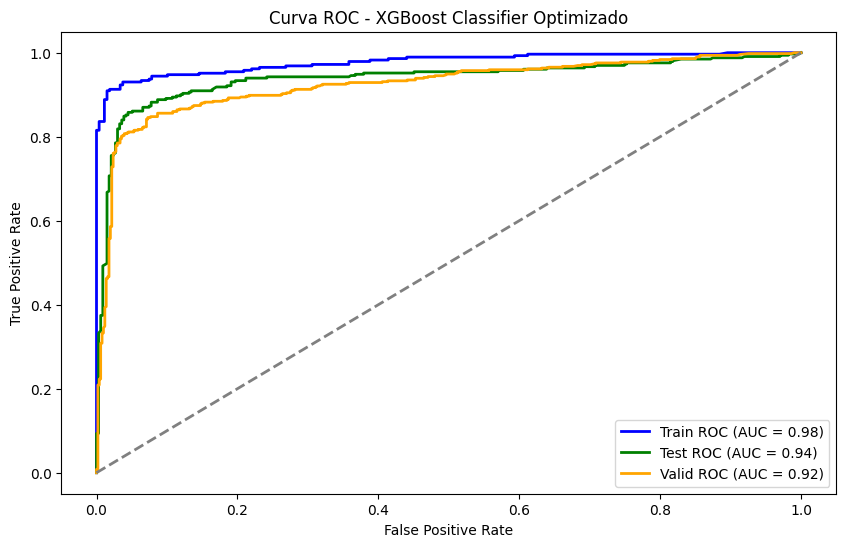


Cuadro de Métricas:
       F1-Score  Accuracy    Recall   AUC-ROC
Train  0.945848  0.945946  0.912892  0.977397
Test   0.897397  0.899399  0.885196  0.938617
Valid  0.871267  0.875125  0.858012  0.924628


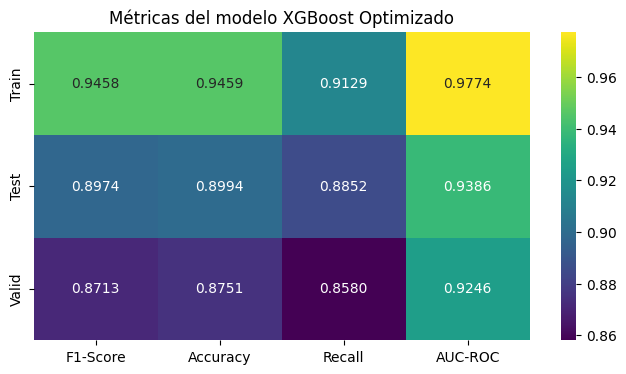

In [19]:
# Optimiacion Bayesiana para el modelo XGBoost

param_space = {
    'n_estimators': (50, 500),                  # Número de árboles
    'learning_rate': (0.01, 0.2),               # Tasa de aprendizaje
    'max_depth': (3, 20),                       # Profundidad máxima de los árboles
    'min_child_weight': (1, 10),                # Peso mínimo de las hojas
    'subsample': (0.5, 1.0),                    # Fracción de muestras usadas para entrenar cada árbol
    'colsample_bytree': (0.1, 1.0)              # Fracción de características utilizadas en cada árbol
}

# Instanciamos el modelo XGBClassifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Realizamos la optimización con BayesSearchCV (buscando maximizar el AUC-ROC)
opt_xgb = BayesSearchCV(xgb_model, param_space, n_iter=50, cv=5, n_jobs=-1, verbose=0, scoring='roc_auc')

# Ajustamos el modelo optimizado sobre los datos de entrenamiento
opt_xgb.fit(features_train_balanced_scaled, target_train_balanced)

# Establecemos el mejor modelo encontrado
best_model = opt_xgb.best_estimator_
print("Mejores parámetros encontrados:", opt_xgb.best_params_)

# Predicciones de probabilidad (para AUC-ROC)
y_train_pred_prob = best_model.predict_proba(features_train_balanced_scaled)[:, 1]
y_test_pred_prob  = best_model.predict_proba(features_test_scaled)[:, 1]
y_valid_pred_prob = best_model.predict_proba(features_valid)[:, 1]

# Predicciones de clase (para Accuracy, Recall, F1-Score)
y_train_pred = best_model.predict(features_train_balanced_scaled)
y_test_pred  = best_model.predict(features_test_scaled)
y_valid_pred = best_model.predict(features_valid)

# ---------------------------
# Cálculo de métricas para cada conjunto

# AUC-ROC
train_auc = roc_auc_score(target_train_balanced, y_train_pred_prob)
test_auc  = roc_auc_score(target_test, y_test_pred_prob)
valid_auc = roc_auc_score(target_valid, y_valid_pred_prob)

# Accuracy
train_acc = accuracy_score(target_train_balanced, y_train_pred)
test_acc  = accuracy_score(target_test, y_test_pred)
valid_acc = accuracy_score(target_valid, y_valid_pred)

# Recall
train_recall = recall_score(target_train_balanced, y_train_pred)
test_recall  = recall_score(target_test, y_test_pred)
valid_recall = recall_score(target_valid, y_valid_pred)

# F1-Score
train_f1 = f1_score(target_train_balanced, y_train_pred)
test_f1  = f1_score(target_test, y_test_pred)
valid_f1 = f1_score(target_valid, y_valid_pred)

# ---------------------------
# Validación cruzada para AUC-ROC (opcional, para robustecer la evaluación)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_auc_scores(features, target):
    scores = []
    # Si 'target' es un DataFrame/Series, usar .iloc[] y convertir a array
    target_array = target.iloc[:] if isinstance(target, pd.Series) else target
    for train_idx, val_idx in cv.split(features, target_array):
        X_train_fold, X_val_fold = features[train_idx], features[val_idx]
        y_train_fold = np.array(target.iloc[train_idx]) if isinstance(target, pd.Series) else target[train_idx]
        y_val_fold   = np.array(target.iloc[val_idx]) if isinstance(target, pd.Series) else target[val_idx]
        best_model.fit(X_train_fold, y_train_fold)
        y_val_pred_prob = best_model.predict_proba(X_val_fold)[:, 1]
        scores.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    return np.mean(scores)

mean_cv_auc_train = cv_auc_scores(features_train_balanced_scaled, target_train_balanced)
mean_cv_auc_test  = cv_auc_scores(features_test_scaled, target_test)
mean_cv_auc_valid = cv_auc_scores(features_valid, target_valid)

# ---------------------------
# Calculamos la curva ROC para cada conjunto
fpr_train, tpr_train, _ = roc_curve(target_train_balanced, y_train_pred_prob)
fpr_test,  tpr_test,  _ = roc_curve(target_test, y_test_pred_prob)
fpr_valid, tpr_valid, _ = roc_curve(target_valid, y_valid_pred_prob)

roc_auc_train_curve = auc(fpr_train, tpr_train)
roc_auc_test_curve  = auc(fpr_test, tpr_test)
roc_auc_valid_curve = auc(fpr_valid, tpr_valid)

# Graficamos la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC (AUC = {roc_auc_train_curve:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC (AUC = {roc_auc_test_curve:.2f})')
plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'Valid ROC (AUC = {roc_auc_valid_curve:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost Classifier Optimizado')
plt.legend(loc='lower right')
plt.show()

# ---------------------------
# Creamos un DataFrame con las métricas y visualizarlo con un heatmap

metrics_df = pd.DataFrame({
    "F1-Score": [train_f1, test_f1, valid_f1],
    "Accuracy": [train_acc, test_acc, valid_acc],
    "Recall": [train_recall, test_recall, valid_recall],
    "AUC-ROC": [train_auc, test_auc, valid_auc]
}, index=["Train", "Test", "Valid"])

print("\nCuadro de Métricas:")
print(metrics_df)

plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='viridis', cbar=True)
plt.title("Métricas del modelo XGBoost Optimizado")
plt.show()


#### Comparacion de caracteristicas: tomaremos mas caracteristicas de las caracteristicas rechazadas para ver si podemos mejorar las metricas

In [20]:
# Ahora correremos con ranking top 10 de caracteristicas
features_selected = features[features.columns[(boruta_selector.ranking_ <= 10)]]
print(features_selected.columns,'\n')

features_boruta_selected = features_balanced[features_selected.columns]

Index(['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL'],
      dtype='object') 



In [21]:
# Escalamiento de valores

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos y transforma las columnas numéricas
features_scaled_balanced = scaler.fit_transform(features_boruta_selected)

# Obtenemos los valores de entrenamiento y revision
features_train_balanced_scaled, features_review, target_train_balanced, target_review = train_test_split(features_scaled_balanced, target_balanced, train_size=0.25, random_state=42)
# Obtenemos los datos de prueba y validacion
features_test_scaled, features_valid, target_test, target_valid =train_test_split(features_review,target_review, train_size=0.4, random_state=42)


Resultados de Evaluación:
                  Model Name     CV F1  CV Precision  CV Recall  CV AUC-ROC
0                    XGBoost  0.866003      0.876835   0.857048    0.928101
1          Gradient Boosting  0.859984      0.861241   0.857108    0.922831
2              Random Forest  0.851104      0.909768   0.801210    0.932457
3                Naive Bayes  0.809069      0.813534   0.804779    0.858604
4                        SVM  0.799239      0.784997   0.815185    0.875187
5        Logistic Regression  0.777003      0.768188   0.787417    0.862771
6             MLP Classifier  0.762695      0.774228   0.732002    0.836238
7  K-Nearest Neighbors (KNN)  0.740902      0.695109   0.794434    0.761384
8             SGD Classifier  0.722104      0.735111   0.717423    0.792181


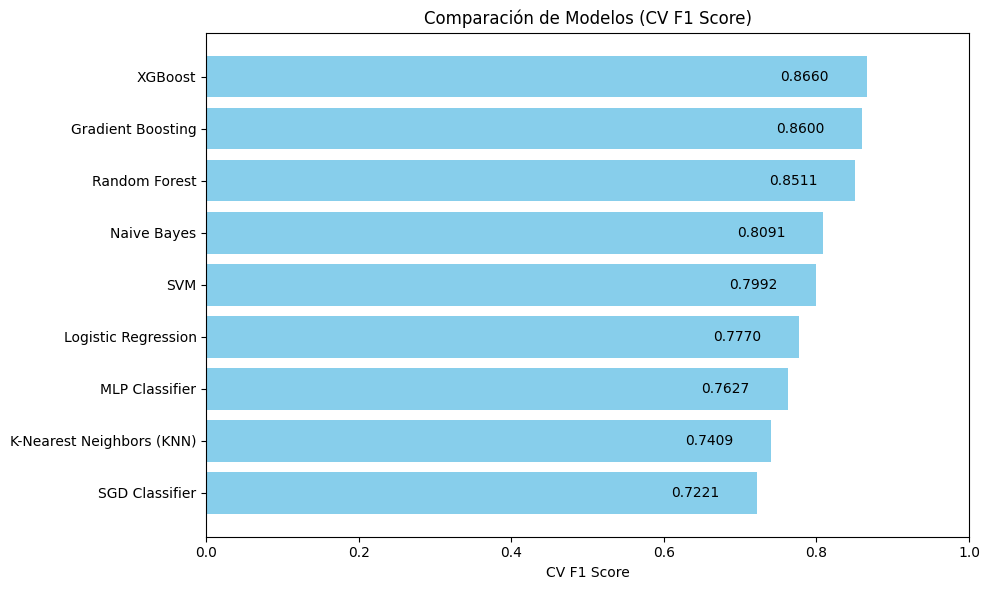

In [22]:
# Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # Necesario para calcular AUC-ROC
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "MLP Classifier": MLPClassifier(learning_rate_init=0.1, hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(random_state=42)  
}

# Función para evaluar modelos y calcular métricas
def evaluate_model(model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    
def evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test):
    model.fit(features_train_balanced_scaled, target_train_balanced)
    
    # Calcular probabilidades o función de decisión para AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(features_test_scaled)[:, 1]
    else:
        y_pred_prob = model.decision_function(features_test_scaled)
    
    # Predicciones de clase
    y_pred = model.predict(features_test_scaled)
    
    # Métricas en test
    auc_score = roc_auc_score(target_test, y_pred_prob)
    f1 = f1_score(target_test, y_pred)
    precision = precision_score(target_test, y_pred)
    recall = recall_score(target_test, y_pred)
    
    # Validación cruzada (usamos 5-fold)
    cv_f1 = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='f1'))
    cv_precision = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='precision'))
    cv_recall = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='recall'))
    cv_auc = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='roc_auc'))
    
    return {
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC-ROC': auc_score,
        'CV F1': cv_f1,
        'CV Precision': cv_precision,
        'CV Recall': cv_recall,
        'CV AUC-ROC': cv_auc,
        'Model': model
    }

# Listas para almacenar resultados
results = []

for model_name, model in models.items():
    metrics = evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test)
    metrics['Model Name'] = model_name
    results.append(metrics)

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['Model Name', 'F1', 'Precision', 'Recall', 'AUC-ROC', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC'])
results_df = results_df.sort_values(by='CV F1', ascending=False).reset_index(drop=True)

print("Resultados de Evaluación:")
print(results_df[['Model Name', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC']])

resultad_df_sorted = results_df.sort_values(by='CV F1', ascending=True)

# Gráfico de barras horizontal utilizando la métrica CV F1 Score
plt.figure(figsize=(10, 6))
bars = plt.barh(resultad_df_sorted['Model Name'],resultad_df_sorted['CV F1'] , color='skyblue')
plt.xlabel('CV F1 Score')
plt.title('Comparación de Modelos (CV F1 Score)')
plt.xlim(0, 1)

# Agregar los valores al lado de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()


In [23]:
# Ahora correremos con ranking top 28 todas las caracteristicas
features_selected = features[features.columns[(boruta_selector.ranking_ <= 28)]]
print(features_selected.columns,'\n')

features_boruta_selected = features_balanced[features_selected.columns]

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object') 



In [24]:
# Escalamiento de valores

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos y transforma las columnas numéricas
features_scaled_balanced = scaler.fit_transform(features_boruta_selected)

# Obtenemos los valores de entrenamiento y revision
features_train_balanced_scaled, features_review, target_train_balanced, target_review = train_test_split(features_scaled_balanced, target_balanced, train_size=0.25, random_state=42)
# Obtenemos los datos de prueba y validacion
features_test_scaled, features_valid, target_test, target_valid =train_test_split(features_review,target_review, train_size=0.4, random_state=42)


Resultados de Evaluación:
                  Model Name     CV F1  CV Precision  CV Recall  CV AUC-ROC
0                    XGBoost  0.889265      0.925838   0.856927    0.938048
1          Gradient Boosting  0.872068      0.873573   0.860738    0.936030
2              Random Forest  0.847199      0.869192   0.787538    0.919785
3        Logistic Regression  0.799993      0.786850   0.814822    0.873111
4                        SVM  0.794354      0.803830   0.787235    0.872329
5                Naive Bayes  0.759729      0.748250   0.773200    0.824031
6             SGD Classifier  0.745738      0.755236   0.738294    0.817130
7             MLP Classifier  0.745240      0.744522   0.748881    0.845061
8  K-Nearest Neighbors (KNN)  0.726365      0.620057   0.878100    0.744718


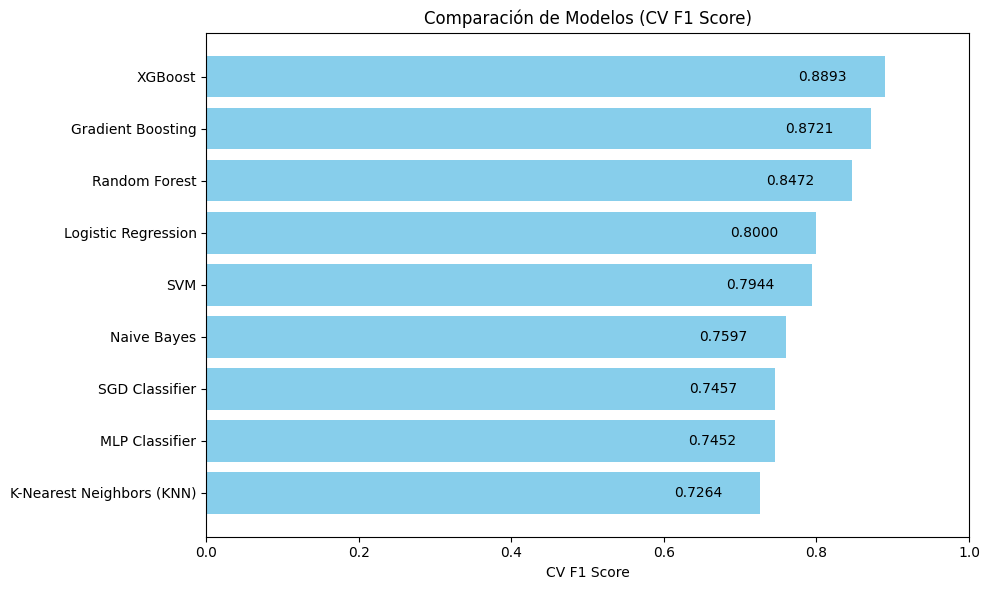

In [25]:
# Diccionario de modelos
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # Necesario para calcular AUC-ROC
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "MLP Classifier": MLPClassifier(learning_rate_init=0.1, hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(random_state=42)  
}

# Función para evaluar modelos y calcular métricas
def evaluate_model(model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train)
    
def evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test):
    model.fit(features_train_balanced_scaled, target_train_balanced)
    
    # Calcular probabilidades o función de decisión para AUC
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(features_test_scaled)[:, 1]
    else:
        y_pred_prob = model.decision_function(features_test_scaled)
    
    # Predicciones de clase
    y_pred = model.predict(features_test_scaled)
    
    # Métricas en test
    auc_score = roc_auc_score(target_test, y_pred_prob)
    f1 = f1_score(target_test, y_pred)
    precision = precision_score(target_test, y_pred)
    recall = recall_score(target_test, y_pred)
    
    # Validación cruzada (usamos 5-fold)
    cv_f1 = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='f1'))
    cv_precision = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='precision'))
    cv_recall = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='recall'))
    cv_auc = np.mean(cross_val_score(model, features_train_balanced_scaled, target_train_balanced, cv=5, scoring='roc_auc'))
    
    return {
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC-ROC': auc_score,
        'CV F1': cv_f1,
        'CV Precision': cv_precision,
        'CV Recall': cv_recall,
        'CV AUC-ROC': cv_auc,
        'Model': model
    }

# Listas para almacenar resultados
results = []

for model_name, model in models.items():
    metrics = evaluate_model(model, features_train_balanced_scaled, target_train_balanced, features_test_scaled, target_test)
    metrics['Model Name'] = model_name
    results.append(metrics)

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['Model Name', 'F1', 'Precision', 'Recall', 'AUC-ROC', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC'])
results_df = results_df.sort_values(by='CV F1', ascending=False).reset_index(drop=True)

print("Resultados de Evaluación:")
print(results_df[['Model Name', 'CV F1', 'CV Precision', 'CV Recall', 'CV AUC-ROC']])

resultad_df_sorted = results_df.sort_values(by='CV F1', ascending=True)

# Gráfico de barras horizontal utilizando la métrica CV F1 Score
plt.figure(figsize=(10, 6))
bars = plt.barh(resultad_df_sorted['Model Name'],resultad_df_sorted['CV F1'] , color='skyblue')
plt.xlabel('CV F1 Score')
plt.title('Comparación de Modelos (CV F1 Score)')
plt.xlim(0, 1)

# Agregar los valores al lado de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()


Resultados del conjunto de prueba:
   Risk Score Riesgo (según threshold)
0         0.8              Alto Riesgo
1         0.5              Bajo Riesgo
2         0.4              Bajo Riesgo
3         0.7              Alto Riesgo
4         0.7              Alto Riesgo

Resultados del conjunto de validación:
   Risk Score Riesgo (según threshold)
0         0.9              Alto Riesgo
1         0.7              Alto Riesgo
2         0.8              Alto Riesgo
3         1.0              Alto Riesgo
4         0.8              Alto Riesgo


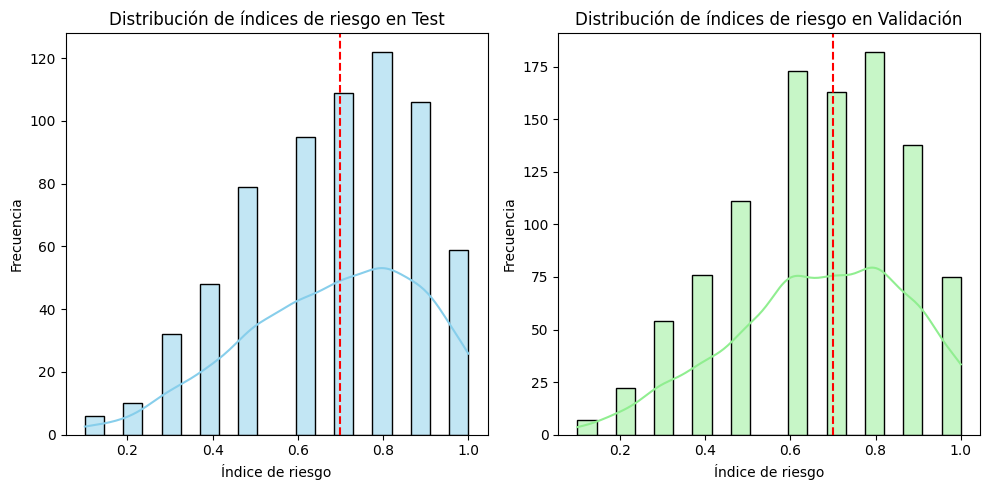

In [26]:
#Estableceremos niveles de riesgo para los pacientes alto riesgo y bajo riesgo usaremos KNN vecinos con la distancia de Mahalanobis
# para ver la frecuencia de pacientes que con determinadas caracteristicas se acercan mas a un paciente con Alzheimer 
# Parámetros del método k-NN
k = 10  # Número de vecinos a considerar

# Calculamos la matriz de covarianza a partir de las características de entrenamiento
# rowvar=False indica que cada columna es una variable
cov_matrix = np.cov(features_train_balanced_scaled, rowvar=False)

# Calcular la matriz inversa de covarianza (necesaria para la distancia Mahalanobis)
VI = np.linalg.inv(cov_matrix)

# Instanciamos el modelo k-NN usando la distancia Mahalanobis
nn_model = NearestNeighbors(n_neighbors=k, 
                              metric='mahalanobis', 
                              metric_params={'VI': VI})
nn_model.fit(features_train_balanced_scaled)

# Función para calcular el "índice de riesgo" a partir de los k vecinos:
# Para cada muestra, se obtiene la proporción de vecinos (del conjunto de entrenamiento)
# que tienen target == 1 (por ejemplo, con Alzheimer)
def compute_risk_scores(features, nn_model, target_train, k):
    # Obtener los índices de los k vecinos para cada muestra en 'features'
    distances, indices = nn_model.kneighbors(features)
    risk_scores = []
    # Iteramos sobre cada muestra
    for i in range(features.shape[0]):
        # Obtener los índices de los vecinos más cercanos
        neighbor_indices = indices[i]
        # Extraer las etiquetas correspondientes 
        neighbor_labels = target_train.iloc[neighbor_indices].values
        # Calcular la proporción de vecinos con target 1
        risk_score = np.mean(neighbor_labels)
        risk_scores.append(risk_score)
    return np.array(risk_scores)

# Calcular el índice de riesgo para el conjunto de prueba
risk_scores_test = compute_risk_scores(features_test_scaled, nn_model, target_train_balanced, k)

# Calcular el índice de riesgo para el conjunto de validación
risk_scores_valid = compute_risk_scores(features_valid, nn_model, target_train_balanced, k)

# Definir un umbral para clasificar riesgo (por ejemplo, 0.5)
# Esto puede ajustarse o validarse clínicamente
threshold = 0.7
test_risk_classification = np.where(risk_scores_test >= threshold, 'Alto Riesgo', 'Bajo Riesgo')
valid_risk_classification = np.where(risk_scores_valid >= threshold, 'Alto Riesgo', 'Bajo Riesgo')

# Mostrar algunos resultados
test_results = pd.DataFrame({
    'Risk Score': risk_scores_test,
    'Riesgo (según threshold)': test_risk_classification
})
valid_results = pd.DataFrame({
    'Risk Score': risk_scores_valid,
    'Riesgo (según threshold)': valid_risk_classification
})

print("Resultados del conjunto de prueba:")
print(test_results.head())

print("\nResultados del conjunto de validación:")
print(valid_results.head())

# ---------------------------
# Visualización de la distribución de los índices de riesgo
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(risk_scores_test, bins=20, kde=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--')
plt.title('Distribución de índices de riesgo en Test')
plt.xlabel('Índice de riesgo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(risk_scores_valid, bins=20, kde=True, color='lightgreen')
plt.axvline(threshold, color='red', linestyle='--')
plt.title('Distribución de índices de riesgo en Validación')
plt.xlabel('Índice de riesgo')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### Conclusiones
En este estudio se evaluaron los tres modelos mejores de clasificación para predecir la probabilidad de Alzheimer a partir de información clínica y resultados de exámenes médicos, utilizando el AUC-ROC como métrica principal. Inicialmente, con las clases balanceadas y mediante la selección de características relevantes (según Boruta), se obtuvieron los siguientes resultados:

- Random Forest: AUC-ROC = 0.9363
- Gradient Boosting Classifier: AUC-ROC = 0.9305
- XGBoost: AUC-ROC = 0.9291
El AUC-ROC se eligió como métrica debido a su capacidad para evaluar la discriminación del modelo sin depender de un umbral de clasificación fijo.

Posteriormente, se optimizaron estos modelos utilizando optimización bayesiana, obteniéndose:

Random Forest optimizado:

- Entrenamiento: AUC-ROC = 0.9629
- Prueba: AUC-ROC = 0.9408
- Validación: AUC-ROC = 0.9257
- Este modelo muestra un desempeño sólido y consistente, con una ligera disminución del AUC-ROC de entrenamiento a validación, lo cual es normal y sugiere buena capacidad de generalización.

Gradient Boosting optimizado:

- Entrenamiento: AUC-ROC = 0.9937
- Prueba: AUC-ROC = 0.9377
- Validación: AUC-ROC = 0.9307
- Aunque se observa un AUC-ROC casi perfecto en entrenamiento, la diferencia con los conjuntos de prueba y validación indica un posible sobreajuste, lo que podría limitar su desempeño en datos nuevos.

XGBoost optimizado: (asumiendo que el tercer conjunto de resultados corresponde a este modelo)

- Entrenamiento: AUC-ROC = 0.9775
- Prueba: AUC-ROC = 0.9365
- Validación: AUC-ROC = 0.9272
- Este modelo presenta buenos resultados en general, aunque sus métricas en validación son ligeramente inferiores a las de Random Forest optimizado.

Selección del Modelo Final

Considerando la consistencia de los resultados en entrenamiento, prueba y validación, el modelo Random Forest optimizado se destaca por su equilibrio y robustez. Con un AUC-ROC de 0.9629 en entrenamiento, 0.9408 en prueba y 0.9257 en validación, este modelo muestra una capacidad de generalización sólida y se escoge como la opción final para predecir qué pacientes podrían tener Alzheimer a partir de la información clínica y de exámenes médicos.

